In [1]:
import numpy as np

### Creating your own GRN

# Generate the cell lineage first

In [ ]:
# #!/usr/bin/env python3

# import random
# import time

# import networkx as nx
# import matplotlib.pyplot as plt
# import numpy as np

# def get_adjacency_matrix(G):
#     return nx.to_numpy_array(G, dtype=int)

# def generate_random_cell_cycle(total_nodes=None,
#                                min_per_rank=2,
#                                max_per_rank=3,
#                                min_ranks=1,
#                                max_ranks=5,
#                                percent=20,
#                                master_regulators=0):
#     """
#     Generate a DAG allowing multiple parents per node.
#     - Fixed-N: each potential prior node j < idx has percent% chance to connect.
#       Ensure at least one parent for every non-master node.
#     - Rank-based: chain first rank; for each new node, each existing node
#       j has percent% chance to connect. Ensure at least one parent.
#     Returns (G, initial_master_regulator_list).
#     """
#     random.seed(time.time())
#     G = nx.DiGraph()

#     # Fixed-N mode
#     if total_nodes is not None:
#         all_indices = list(range(total_nodes))
#         mr_indices = sorted(random.sample(all_indices, master_regulators)) if master_regulators > 0 else []
#         dag_indices = [i for i in all_indices if i not in mr_indices]

#         G.add_nodes_from(dag_indices)
#         for idx, node in enumerate(dag_indices):
#             # random parents
#             for j in range(idx):
#                 if random.randint(0, 99) < percent:
#                     G.add_edge(dag_indices[j], node)
#             # ensure at least one parent
#             if idx > 0 and G.in_degree(node) == 0:
#                 parent = random.choice(dag_indices[:idx])
#                 G.add_edge(parent, node)
#         return G, mr_indices

#     # Rank-based mode
#     nodes = 0
#     ranks = random.randint(min_ranks, max_ranks)
#     all_ranks = []
#     for r in range(ranks):
#         new_nodes = random.randint(min_per_rank, max_per_rank)
#         current_rank = list(range(nodes, nodes + new_nodes))
#         G.add_nodes_from(current_rank)

#         if r == 0:
#             # chain first rank
#             for i in range(1, len(current_rank)):
#                 G.add_edge(current_rank[i-1], current_rank[i])

#         # random parents from any existing node
#         for node in current_rank:
#             for j in range(nodes):
#                 if random.randint(0, 99) < percent:
#                     G.add_edge(j, node)
#             # ensure at least one parent if not first rank
#             if r > 0 and G.in_degree(node) == 0:
#                 parent = random.choice(all_ranks[-1])
#                 G.add_edge(parent, node)

#         nodes += new_nodes
#         all_ranks.append(current_rank)

#     return G, []

# def visualize_dag(G):
#     """Display the DAG with spring layout."""
#     plt.figure(figsize=(10, 6))
#     pos = nx.spring_layout(G, seed=42, k=0.9, iterations=100)
#     nx.draw_networkx(G, pos,
#                      node_color='skyblue', node_size=700,
#                      edge_color='gray', arrows=True,
#                      arrowstyle='-|>', arrowsize=20,
#                      font_size=10)
#     plt.title("Randomly Generated DAG")
#     plt.axis('off')
#     plt.tight_layout()
#     plt.show()

# def perturb_adjacency_matrix(matrix, min_val=0.8, max_val=1.0):
#     """Replace each 1 with a random float in [min_val, max_val]."""
#     perturbed = matrix.astype(float).copy()
#     ones = np.where(matrix == 1)
#     for i, j in zip(*ones):
#         perturbed[i, j] = round(random.uniform(min_val, max_val), 1)
#     return perturbed

# def find_isolated_nodes(G):
#     return [n for n in G.nodes() if G.in_degree(n) == 0 and G.out_degree(n) == 0]

# def generate_interactions_from_dag(G,
#                                    inhibit_pct=50):
#     """
#     Build multi-regulator interactions:
#       (target, nRegs, [regs], [K], [coop])
#     coop is always 2.0; Ks random ± in [0.5,5.0].
#     """
#     interactions = []
#     for v in sorted(G.nodes()):
#         regs = list(G.predecessors(v))
#         if not regs:
#             continue
#         Ks = []
#         for u in regs:
#             mag = round(random.uniform(0.5, 5.0), 2)
#             if random.randint(1, 100) <= inhibit_pct:
#                 mag = -abs(mag)
#             Ks.append(mag)
#         coops = [2.0] * len(regs)
#         interactions.append((v, len(regs), regs, Ks, coops))
#     return interactions

# def main(mode,
#          total_nodes,
#          min_per_rank,
#          max_per_rank,
#          min_ranks,
#          max_ranks,
#          percent=20,
#          inhibit_pct=50,
#          master_regulators=0,
#          num_celltypes=None):
#     """
#     mode 'cell': prints & saves adjacency + perturbed matrices
#     mode 'gene': prints & and saves multi-reg interactions + master regulator profiles
#     Required: total_nodes, min_per_rank, max_per_rank, min_ranks, max_ranks.
#     In gene mode: master_regulators, num_celltypes required.
#     """
#     # validate
#     required = {
#         'total_nodes': total_nodes,
#         'min_per_rank': min_per_rank, 'max_per_rank': max_per_rank,
#         'min_ranks': min_ranks, 'max_ranks': max_ranks
#     }
#     missing = [k for k, v in required.items() if v is None]
#     if missing:
#         raise ValueError(f"Missing required params: {', '.join(missing)}")
#     if mode not in ('cell', 'gene'):
#         raise ValueError("mode must be 'cell' or 'gene'")
#     if mode == 'gene' and (master_regulators is None or num_celltypes is None):
#         raise ValueError("master_regulators and num_celltypes are required in gene mode")

#     # generate
#     dag, mr_initial = generate_random_cell_cycle(
#         total_nodes, min_per_rank, max_per_rank, min_ranks, max_ranks, percent, master_regulators
#     )

#     visualize_dag(dag)
#     print("Isolated Nodes:", find_isolated_nodes(dag))

#     if mode == 'cell':
#         mat = get_adjacency_matrix(dag)
#         print("\nAdjacency Matrix:")
#         for row in mat:
#             print("\t".join('0' if v == 0 else str(v) for v in row))
#         pert = perturb_adjacency_matrix(mat)
#         print("\nPerturbed Adjacency Matrix:")
#         for row in pert:
#             print("\t".join('0' if v == 0 else str(v) for v in row))
#         with open("perturbed_matrix.tab", "w") as f:
#             for row in pert:
#                 f.write("\t".join('0' if v == 0 else str(v) for v in row) + "\n")
#         print("\nPerturbed matrix written to perturbed_matrix.tab")

#     else:
#         inters = generate_interactions_from_dag(dag, inhibit_pct)
#         with open("gene_interactions.txt", "w") as f:
#             for (v, n, regs, Ks, coops) in inters:
#                 parts = [str(v), str(n)] + [str(r) for r in regs] + [str(k) for k in Ks] + [str(c) for c in coops]
#                 line = ",".join(parts)
#                 print(line)
#                 f.write(line + "\n")
#         print("\nGene interactions written to gene_interactions.txt")

#         # master regulator profiles
#         affs = {u for _, _, regs, _, _ in inters for u in regs}
#         targs = {v for v, *_ in inters}
#         aff_only = sorted(affs - targs)
#         all_mr = sorted(set(mr_initial) | set(aff_only))
#         if all_mr:
#             with open("master_regulators.txt", "w") as f:
#                 for idx in all_mr:
#                     expr = [round(random.uniform(0.0, 4.0), 4) for _ in range(num_celltypes)]
#                     line = f"{idx}," + ",".join(map(str, expr))
#                     print(line)
#                     f.write(line + "\n")
#             print("\nMaster regulators written to master_regulators.txt")

# # Example calls:
# # main('cell', total_nodes=5, min_per_rank=2, max_per_rank=3, min_ranks=1, max_ranks=5, percent=20)
# # main('gene', total_nodes=10, min_per_rank=2, max_per_rank=3, min_ranks=1, max_ranks=5,
# #      percent=20, inhibit_pct=50, master_regulators=2, num_celltypes=4)


In [21]:
#!/usr/bin/env python3

import random
import time

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def get_adjacency_matrix(G):
    return nx.to_numpy_array(G, dtype=int)

def generate_cell_cycle(total_nodes=None,
                         min_per_rank=2,
                         max_per_rank=3,
                         min_ranks=1,
                         max_ranks=5,
                         percent=20,
                         master_regulators=0):
    """
    DAG with exactly one parent per node for cell differentiation.
    - Fixed-N: each non-master node picks exactly one parent
      (percent% chance from any prior, else the immediate prior).
    - Rank-based: each node picks exactly one parent
      (percent% chance from any existing, else from previous rank).
    Returns (G, initial_master_regulators).
    """
    random.seed(time.time())
    G = nx.DiGraph()

    # Fixed-N single-parent
    if total_nodes is not None:
        all_idx = list(range(total_nodes))
        mr_idx = sorted(random.sample(all_idx, master_regulators)) if master_regulators > 0 else []
        dag_idx = [i for i in all_idx if i not in mr_idx]
        G.add_nodes_from(dag_idx)
        for i, node in enumerate(dag_idx[1:], start=1):
            if random.randint(0,99) < percent:
                parent = random.choice(dag_idx[:i])
            else:
                parent = dag_idx[i-1]
            G.add_edge(parent, node)
        return G, mr_idx

    # Rank-based single-parent
    nodes = 0
    ranks = random.randint(min_ranks, max_ranks)
    all_ranks = []
    for r in range(ranks):
        new_n = random.randint(min_per_rank, max_per_rank)
        curr = list(range(nodes, nodes + new_n))
        G.add_nodes_from(curr)
        if r == 0:
            for j in range(1, len(curr)):
                G.add_edge(curr[j-1], curr[j])
        else:
            prev = all_ranks[-1]
            for node in curr:
                if random.randint(0,99) < percent:
                    parent = random.randint(0, nodes-1)
                else:
                    parent = random.choice(prev)
                G.add_edge(parent, node)
        nodes += new_n
        all_ranks.append(curr)
    return G, []


def generate_gene_network(total_nodes=None,
                           min_per_rank=2,
                           max_per_rank=3,
                           min_ranks=1,
                           max_ranks=5,
                           percent=20,
                           master_regulators=0):
    """
    DAG allowing multiple parents per node for gene regulatory network.
    - Fixed-N: each prior node has percent% chance to connect.
      Ensures at least one parent per non-root.
    - Rank-based: chain first rank; then each new node may connect
      from any existing (percent% chance), ensures at least one parent.
    Returns (G, initial_master_regulators).
    """
    random.seed(time.time())
    G = nx.DiGraph()
    if total_nodes is not None:
        all_idx = list(range(total_nodes))
        mr_idx = sorted(random.sample(all_idx, master_regulators)) if master_regulators > 0 else []
        dag_idx = [i for i in all_idx if i not in mr_idx]
        G.add_nodes_from(dag_idx)
        for i, node in enumerate(dag_idx):
            for j in range(i):
                if random.randint(0,99) < percent:
                    G.add_edge(dag_idx[j], node)
            if i > 0 and G.in_degree(node) == 0:
                parent = random.choice(dag_idx[:i])
                G.add_edge(parent, node)
        return G, mr_idx
    nodes = 0
    ranks = random.randint(min_ranks, max_ranks)
    all_ranks = []
    for r in range(ranks):
        new_n = random.randint(min_per_rank, max_per_rank)
        curr = list(range(nodes, nodes + new_n))
        G.add_nodes_from(curr)
        if r == 0:
            for j in range(1, len(curr)):
                G.add_edge(curr[j-1], curr[j])
        for node in curr:
            for j in range(nodes):
                if random.randint(0,99) < percent:
                    G.add_edge(j, node)
            if r > 0 and G.in_degree(node) == 0:
                parent = random.choice(all_ranks[-1])
                G.add_edge(parent, node)
        nodes += new_n
        all_ranks.append(curr)
    return G, []


def visualize_dag(G):
    plt.figure(figsize=(10,6))
    pos = nx.spring_layout(G, seed=42, k=0.9, iterations=100)
    nx.draw_networkx(G, pos,
                     node_color='skyblue', node_size=700,
                     edge_color='gray', arrows=True,
                     arrowstyle='-|>', arrowsize=20,
                     font_size=10)
    plt.title("Randomly Generated DAG")
    plt.axis('off')
    plt.tight_layout()
    plt.show()


def perturb_adjacency_matrix(matrix, min_val=0.8, max_val=1.0):
    pert = matrix.astype(float).copy()
    ones = np.where(matrix == 1)
    for i,j in zip(*ones):
        pert[i,j] = round(random.uniform(min_val, max_val),1)
    return pert


def find_isolated_nodes(G):
    return [n for n in G.nodes() if G.in_degree(n)==0 and G.out_degree(n)==0]


def generate_interactions_from_dag(G, inhibit_pct=50):
    interactions = []
    for v in sorted(G.nodes()):
        regs = list(G.predecessors(v))
        if not regs: continue
        Ks = []
        for u in regs:
            mag = round(random.uniform(0.5,5.0),2)
            if random.randint(1,100) <= inhibit_pct:
                mag = -abs(mag)
            Ks.append(mag)
        coops = [2.0]*len(regs)
        interactions.append((v, len(regs), regs, Ks, coops))
    return interactions


def main(mode,
         total_nodes,
         min_per_rank,
         max_per_rank,
         min_ranks,
         max_ranks,
         percent=20,
         inhibit_pct=50,
         master_regulators=0,
         num_celltypes=None):
    """
    mode 'cell':   cell-cycle single-parent DAG
    mode 'gene':   gene-network multi-parent GRN
    Required: total_nodes, min_per_rank, max_per_rank, min_ranks, max_ranks.
    For gene: master_regulators, num_celltypes.
    """
    # validate common
    req = {k:v for k,v in locals().items() if k in ('total_nodes','min_per_rank','max_per_rank','min_ranks','max_ranks')}
    missing = [k for k,v in req.items() if v is None]
    if missing:
        raise ValueError(f"Missing required params: {', '.join(missing)}")
    if mode not in ('cell','gene'):
        raise ValueError("mode must be 'cell' or 'gene'")
    if mode=='gene' and (master_regulators is None or num_celltypes is None):
        raise ValueError("master_regulators and num_celltypes required in gene mode")

    # pick generator
    if mode=='cell':
        dag, mr_init = generate_cell_cycle(
            total_nodes, min_per_rank, max_per_rank, min_ranks, max_ranks, percent, master_regulators
        )
    else:
        dag, mr_init = generate_gene_network(
            total_nodes, min_per_rank, max_per_rank, min_ranks, max_ranks, percent, master_regulators
        )

    visualize_dag(dag)
    print("Isolated Nodes:", find_isolated_nodes(dag))

    if mode=='cell':
        mat = get_adjacency_matrix(dag)
        print("\nAdjacency Matrix:")
        for row in mat:
            print("\t".join('0' if v==0 else str(v) for v in row))
        pert = perturb_adjacency_matrix(mat)
        print("\nPerturbed Adjacency Matrix:")
        for row in pert:
            print("\t".join('0' if v==0 else str(v) for v in row))
        with open("perturbed_matrix.tab","w") as f:
            for row in pert:
                f.write("\t".join('0' if v==0 else str(v) for v in row)+"\n")
        print("\nPerturbed matrix written to perturbed_matrix.tab")
    else:
        inters = generate_interactions_from_dag(dag, inhibit_pct)
        with open("gene_interactions.txt","w") as f:
            for v,n,regs,Ks,coops in inters:
                parts=[str(v),str(n)]+[str(r) for r in regs]+[str(k) for k in Ks]+[str(c) for c in coops]
                line=",".join(parts)
                print(line)
                f.write(line+"\n")
        print("\nGene interactions written to gene_interactions.txt")
        affs = {u for _,_,regs,_,_ in inters for u in regs}
        targs = {v for v, *rest in inters}
        aff_only=sorted(affs-targs)
        all_mr=sorted(set(mr_init)|set(aff_only))
        if all_mr:
            with open("master_regulators.txt","w") as f:
                header="regulator,"+",".join(f"celltype{i}" for i in range(1,num_celltypes+1))
                print(header); f.write(header+"\n")
                for idx in all_mr:
                    expr=[round(random.uniform(0.0,4.0),4) for _ in range(num_celltypes)]
                    line=f"{idx},"+",".join(map(str,expr))
                    print(line); f.write(line+"\n")
            print("\nMaster regulators written to master_regulators.txt")

# Example:
# main('cell', total_nodes=5, min_per_rank=2, max_per_rank=3, min_ranks=1, max_ranks=5)
# main('gene', total_nodes=10, min_per_rank=2, max_per_rank=3, min_ranks=1, max_ranks=5,
#      percent=20, inhibit_pct=50, master_regulators=2, num_celltypes=4)


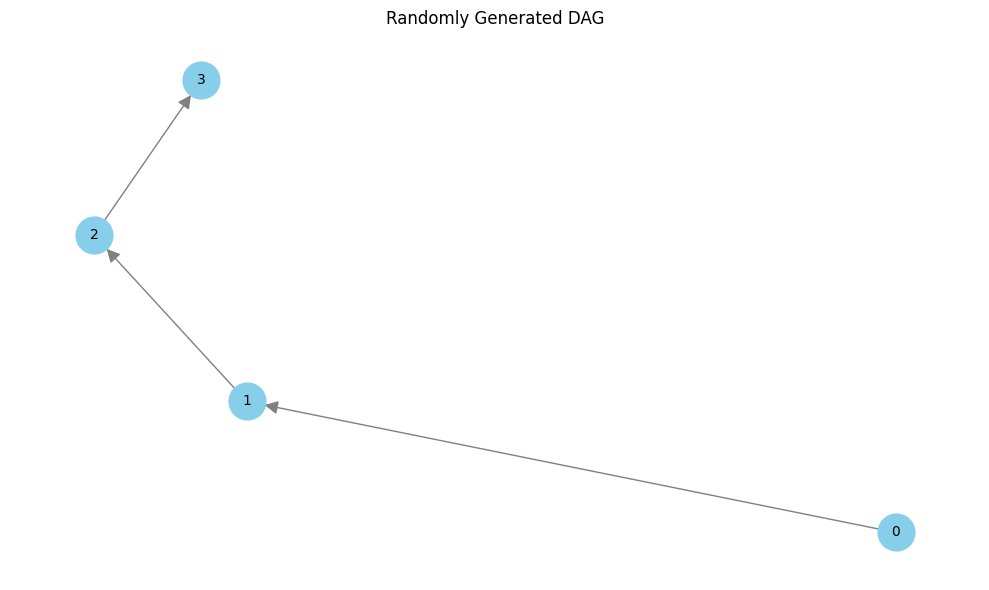

Isolated Nodes: []

Adjacency Matrix:
0	1	0	0
0	0	1	0
0	0	0	1
0	0	0	0

Perturbed Adjacency Matrix:
0	0.9	0	0
0	0	0.9	0
0	0	0	0.9
0	0	0	0

Perturbed matrix written to perturbed_matrix.tab


In [25]:
# import this module, then:
main('cell', total_nodes=4, min_per_rank=1, max_per_rank=4, min_ranks=1, max_ranks=3,percent=50)


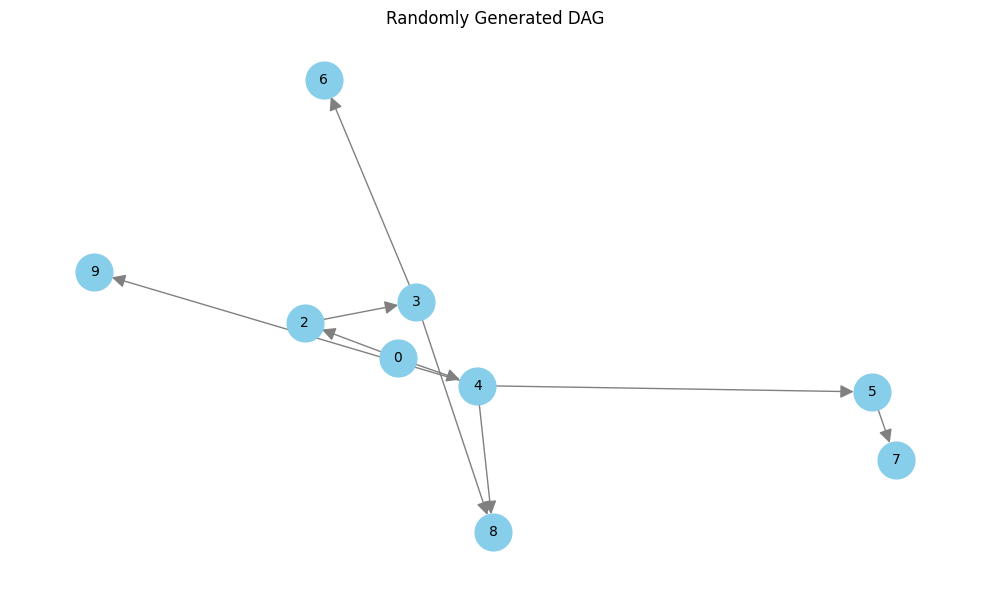

Isolated Nodes: []
2,1,0,-1.49,2.0
3,1,2,-2.4,2.0
4,1,0,3.37,2.0
5,1,4,4.24,2.0
6,1,3,2.01,2.0
7,1,5,2.09,2.0
8,2,3,4,3.05,2.46,2.0,2.0
9,1,4,-3.74,2.0

Gene interactions written to gene_interactions.txt
regulator,celltype1,celltype2,celltype3
0,2.5699,0.1679,2.2602
1,3.7776,2.7425,1.4879

Master regulators written to master_regulators.txt


In [12]:
main('gene', total_nodes=10, min_per_rank=2, max_per_rank=3, min_ranks=1, max_ranks=2, percent=5, inhibit_pct=30, master_regulators=1, num_celltypes=3)